# Derivación en **Python**

Esta sección pretende ser un compendio (esperemos que claro y ordenado) de todo el `Python` que hemos ido usando en el Capítulo 3.

Objetivos:

* Cálculo de derivadas con `Sympy`.
* Implementación en `Numpy` del método numérico de Newton-Raphson.
* Derivadas sucesivas con `Sympy`.
* Uso de `Python` en problemas de máximos y mínimos.
* Cálculo, con `Sympy`, del polinomio de Taylor y del resto. 

## Derivación en `Sympy`

La realizaremos con el comando `sp.diff`, como mostramos en el siguiente ejemplo:

In [19]:
import sympy as sp
x=sp.symbols('x')
f_exp=sp.exp(x)*sp.cos(x)
d1f_exp=sp.diff(f_exp,x)
print('Para la función: ',f_exp)
print('La derivada primera es: ',d1f_exp)

Para la función:  exp(x)*cos(x)
La derivada primera es:  -exp(x)*sin(x) + exp(x)*cos(x)


## Implementación en `Numpy` del método numérico de Newton-Raphson

Mostramos a continuación una implementación directa, mediante un bucle, de este método:

In [20]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3+2*x-2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 10
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 2

for k in range(1,N_max):
    if ( np.abs( f_der(x_aprox[k-1]) ) < 1.e-14 ): break

    x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

    if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])

Número de iteraciones realizadas:  7
Aproximación de la raíz:  0.7709169970592481


En la Sección {ref}`sec_NewtonRaphson` puedes ver el gráfico de este caso con `Matplotlib`.

## Derivadas sucesivas con `Sympy`

Para calcular derivadas sucesivas en `Sympy` tenemos que añadir un parámetro en `sp.diff` que indique el número de veces que queremos derivar:

In [21]:
import sympy as sp

x = sp.symbols('x', real=True)
f_exp = sp.sin(x) + x**2
print('Expresión que queremos derivar: ',f_exp)
print('Primera derivada: ',sp.diff(f_exp,x))
print('Segunda derivada: ',sp.diff(f_exp,x,2))
print('Tercera derivada: ',sp.diff(f_exp,x,3))
# Nota: también se puede usar la siguiente escritura:
# print(f_exp.diff(x,3))

Expresión que queremos derivar:  x**2 + sin(x)
Primera derivada:  2*x + cos(x)
Segunda derivada:  2 - sin(x)
Tercera derivada:  -cos(x)


## Uso de `Python` en problemas de máximos y mínimos

Dado un canal de sección trapezoidal de lado 2, calcular el ángulo $\alpha$ (ver dibujo) que maximiza el área de la sección del canal.

<img src="../../images/cap3-canal.svg" width="300"/>

1. A mano. Obtener la función que proporciona el área del canal en función del ángulo $ \alpha $
2. Simbólicamente: con **Sympy**.
3. Numéricamente mediante el método de Newton con error menor que $ 10^{-4} $.

In [22]:
import sympy as sp
# 2. Resolvemos el problema utilizando Sympy
x,xn=sp.symbols('x,xn')
# Funcion que describe el area de la seccion en funcion del angulo
f=4*sp.sin(x)*(1+sp.cos(x))
d1f=sp.diff(f,x)
d1fn=sp.lambdify(x,d1f)
alphamax=sp.solve(d1f)
print('La sección máxima se alcanza con ángulo: ',float(alphamax[1]))


La sección máxima se alcanza con ángulo:  1.0471975511965979


In [23]:
# 3. Aproximamos el máximo con el método de Newton
maxit=100
eps=1e-4
d2f=sp.diff(d1f,x)
d2fn=sp.lambdify(x,d2f)
xn=np.pi/2
for i in range(0,maxit):
    res=d1fn(xn)/d2fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('Numero de iteraciones realizadas: ',i)
print('Aproximación del ángulo para la sección máxima con NR: ',xn)

Numero de iteraciones realizadas:  4
Aproximación del ángulo para la sección máxima con NR:  1.0471975511965559


## Cálculo, con `Sympy`, del polinomio de Taylor y del resto. 

La siguiente función calcula, de forma simbólica, el polinomio de Taylor de una función dada. 

* Argumentos de entrada: 
    * expresión f, 
    * punto x0, que será el centro de Taylor, 
    * orden del polinomio, n.
* Salida:
    * expresión del polinomio de Taylor, p,
    * epresión del resto de Taylor, r.

In [24]:
import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p,R


## Ejemplo completo de Taylor con `Python`

Queremos aproximar $\ln(1.3)$, utilizando polinomios de Taylor de orden $n=1$ y $n=2$, centrados en $x_{0}=1$, para la función $f(x) = \ln(x)$.

In [25]:
import sympy as sp
import numpy as np

x, t = sp.symbols('x, t', real =True)

# Importamos la function que calcula el polinomio y el resto de Taylor
def taylor(f_exp,x0,n):
    p_exp = 0
    for i in range(n+1):
        p_exp += sp.diff(f_exp,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
        
    R_exp = sp.diff(f_exp,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p_exp,R_exp

x0 = 1  # punto en el que centramos el polinomio de Taylor

# función que queremos aproximar
f_exp = sp.log(x)

# calculamos el Polinomio de Taylor de orden 1 centrado en x0
n = 1 

P1_exp, R1_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 1: \n',P1_exp,'\n Resto de Taylor de orden 1: \n',R1_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P1 = sp.lambdify (x,P1_exp)
print('Aproximación de ln(1.3) con el polinomio de Taylor de orden 1: ', P1(1.3))

# calculamos el Polinomio de Taylor de orden 2 centrado en x0
n = 2 

P2_exp, R2_exp = taylor(f_exp,x0,n)
print('Polinomio de Taylor de orden 2: \n',P2_exp,'\n Resto de Taylor de orden 1: \n',R2_exp,'\n')

# Creamos una función sp.lambdify del polinomio 
P2 = sp.lambdify (x,P2_exp)
print('Aproximación de ln(1.3) con el polinomio de Taylor de orden 2: ', P2(1.3))

Polinomio de Taylor de orden 1: 
 x - 1 
 Resto de Taylor de orden 1: 
 -(x - 1)**2/(2*t**2) 

Aproximación de ln(1.3) con el polinomio de Taylor de orden 1:  0.30000000000000004
Polinomio de Taylor de orden 2: 
 x - (x - 1)**2/2 - 1 
 Resto de Taylor de orden 1: 
 (x - 1)**3/(3*t**3) 

Aproximación de ln(1.3) con el polinomio de Taylor de orden 2:  0.2550000000000001


Dibujamos el resultado con `Matplotlib`:

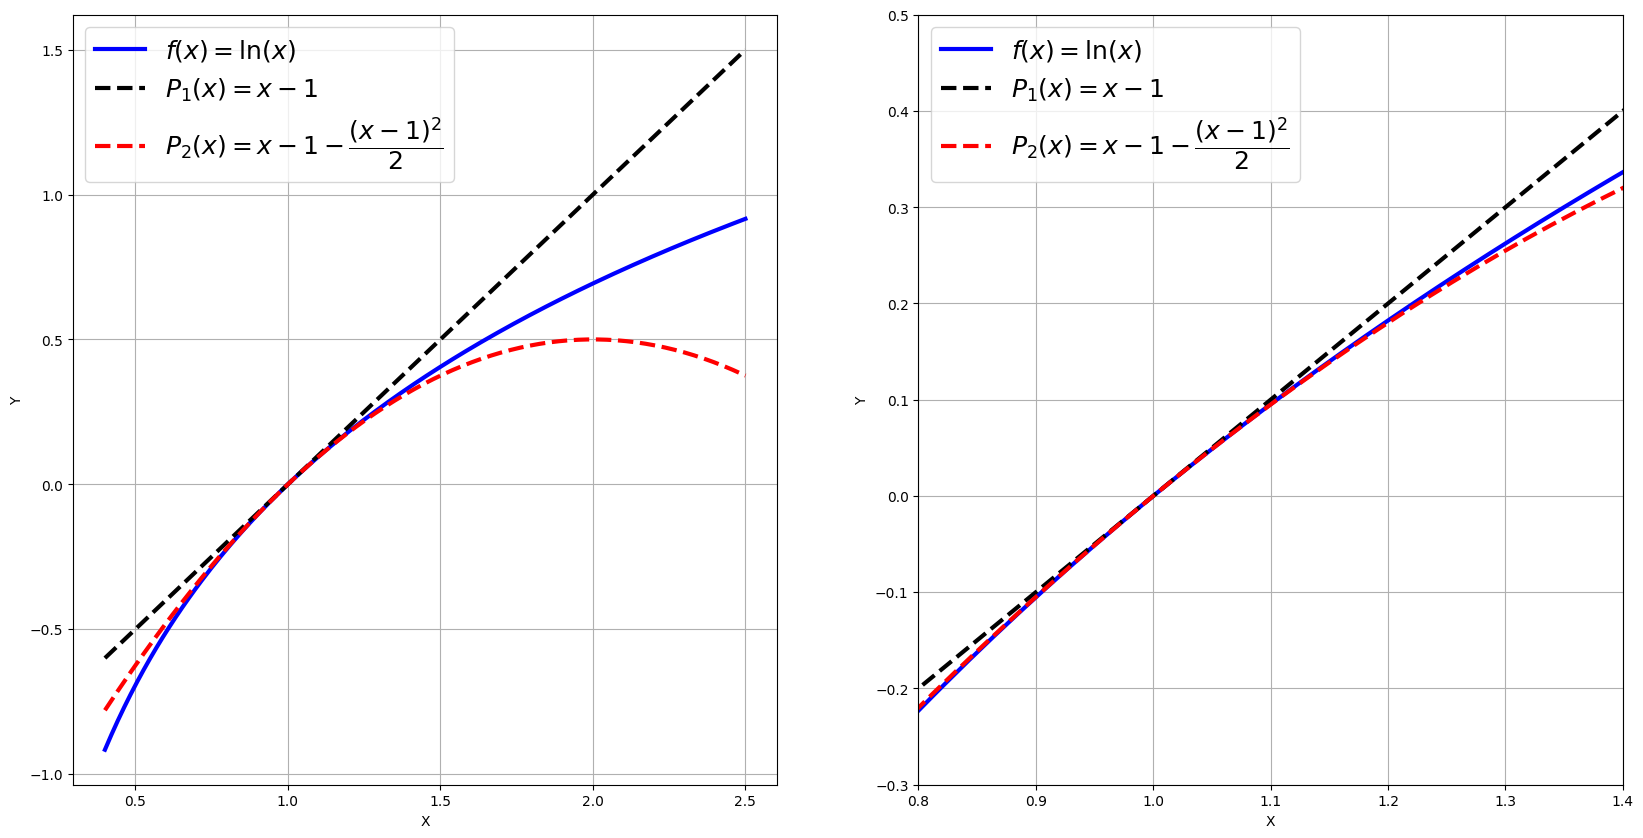

In [26]:
import matplotlib as mp
import matplotlib.pyplot as plt

# Creamos gráficos de funciones
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)

# evaluamos P2 en los puntos de x1
P1x = P1(x1)
P2x = P2(x1)

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='3',  label='$f(x)=\ln(x)$')
ax1.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax1.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='3', label='$f(x)=\ln(x)$')
ax2.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax2.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})

Finalmente, acotaremos el error calculando el máximo del valor absoluto del resto de Taylor de orden 2. 

Para ello, en la expresión `R2_exp`, que hemos obtenido aplicando la *function* Taylor, sustituimos `x` por su valor ($1.3$). 
Definimos entonces una función `Lamda` que dependerá sólo de `t` y buscamos el máximo, en valor absoluto, de esta función comparando su valor en los extremos y en los puntos en los que se anule su derivada.

ptos_criticos_R2:  []
Cota del error:  0.00900000000000000


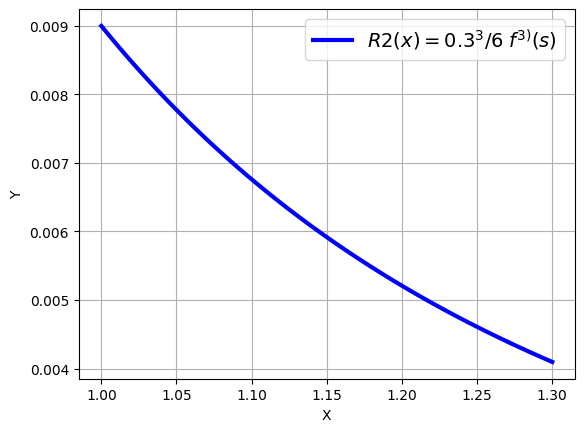

In [27]:
R2_exp_xfijo = R2_exp.subs({x:1.3})
R2 = sp.Lambda (t, R2_exp_xfijo)

# Comprobamos que R2 no tiene puntos críticos
ptos_criticos_R2 = sp.solve (sp.diff(R2,x))
print('ptos_criticos_R2: ',ptos_criticos_R2)

# Elegimos el máximo de R2, en valor absoluto, comparando sus valores en los extremos del intervalo
cota_error = sp.Max( sp.Abs(R2(1.)), sp.Abs(R2(1.3)) )

print('Cota del error: ',cota_error)

# Dibujamos R2 en [1,1.3]
R2_vec = sp.lambdify(t,R2_exp_xfijo)
s1 = np.linspace(1, 1.3, 100)
R2_s1 = R2_vec(s1)
plt.plot(s1, R2_s1, c='b', lw='3',  label='$R2(x)=0.3^{3}/{6}\; f^{3)}(s)$')
plt.ylabel('Y', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.grid()
plt.legend(prop={'size': 14})
plt.show()